In [1]:
!pip install pyscf geometric > /dev/null

In [14]:
from pyscf import gto, scf, dft, mp, cc, mcscf
from pyscf.geomopt import geometric_solver
import matplotlib.pyplot as plt
import sys

In [ ]:
# 分子の定義
mol = gto.M(atom="H 0 0 0; F 0 0 1.1", basis="ccpvdz")

In [ ]:
# hartree-fock計算の実行
mf = scf.RHF(mol)
energy = mf.kernel()

print("Energy:", energy)

converged SCF energy = -99.9873974403489
Energy: -99.98739744034886


In [ ]:
# H2O分子の定義
h2o_mol = gto.M(
    atom = """
    O 0.0 0.0 0.1173
    H 0.0 0.7572 -0.4692
    H 0.0 -0.7572 -0.4692
    """,
    basis = "cc-pVDZ",
    charge=0,
    spin=0
)

In [ ]:
# DFT計算の設定
mf = dft.RKS(h2o_mol)
mf.xc = 'B3LYP'
energy = mf.kernel()

print('DFT Energy with B3YLP functional:', energy)

/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -76.4203688915021
DFT Energy with B3YLP functional: -76.42036889150205


In [ ]:
# 分子の定義
h2O_mol = gto.M(
    atom='''O 0.0 0.0 0.0; H 0.0 -0.757 0.587; H 0.0 0.757 0.587''',
    basis='cc-pVDZ'
)

In [ ]:
# 計算方法の選択と実行
mf = dft.RKS(h2o_mol)
mf.xc = 'B3LYP'
energy = mf.kernel()

print("Energy:", energy)

converged SCF energy = -76.4203688915021
Energy: -76.42036889150211


In [ ]:
hartree_to_eV = 27.2114

energy_ev = energy * hartree_to_eV

print("Energy (eV):", energy_ev)

Energy (eV): -2079.5052260542207


## MP2計算

In [ ]:
# 水分子の定義
h2o_mol = gto.M(atom='O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587;', basis='cc-pVDZ')

# ハートリー・フォック計算
mf = scf.RHF(mol)
mf.kernel()

# # MP2計算
mp2 = mp.MP2(mf)
mp2.kernel()

print("MP2 Energy:", mp2.e_tot)

converged SCF energy = -99.9873974403488
E(MP2) = -100.198764900601  E_corr = -0.211367460252203
E(SCS-MP2) = -100.193014429233  E_corr = -0.205616988884259
MP2 Energy: -100.198764900601


## CCSD計算

In [ ]:
h2o_mol = gto.M(atom="O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587", basis="cc-pVDZ")

mf = scf.RHF(mol).run()
ccsd = cc.CCSD(mf).run()

print('CCSD Energy:', ccsd.e_tot)

converged SCF energy = -99.9873974403489
E(CCSD) = -100.2037350701455  E_corr = -0.2163376297966235
CCSD Energy: -100.20373507014554


## MCSCF計算

In [ ]:
h2o_mol = gto.M(atom='O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587', basis='cc-pVDZ')

mf = scf.RHF(mol).run()
mc = mcscf.CASSCF(mf, 4, 4).run()

print('MCSCF Energy:', mc.e_tot)

converged SCF energy = -99.9873974403488
CASSCF energy = -100.047300358031
CASCI E = -100.047300358031  E(CI) = -7.16443605879068  S^2 = 0.0000000
MCSCF Energy: -100.04730035803063


## 構造最適化計算

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# 計算結果を保存するパスを設定
folder_path = "/content/drive/MyDrive/pyscf"
base_filename = "cfcf"

# フルパスの設定
path = os.path.join(folder_path, base_filename)

# フォルダが存在しない場合は作成
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")

# チェックポイントファイル名の設定
checkpoint_file = path + ".chk"
print(f"Checkpoint file will be saved as: {checkpoint_file}")

Created folder: /content/drive/MyDrive/pyscf
Checkpoint file will be saved as: /content/drive/MyDrive/pyscf/cfcf.chk


In [6]:
from pyscf import gto

mol = gto.M(
    atom = """
    F        0.2814445108      4.6220522399      0.8468305958
    F       -2.8576297500      4.3345350708     -0.8468304265
    C       -0.5710910263      4.5571375244     -0.2399080182
    C       -2.0050933218      4.3994411297      0.2399080055
    H       -0.4731551822      5.4891660861     -0.8356386849
    H       -2.1030307042      3.4674093695      0.8356334763
    H       -0.2879731697      3.6901718904     -0.8734525221
    H       -2.2882089988      5.2664037321      0.8734575742
    """,
    basis="6-31G(d)",
    charge=0, # 分子全体の電荷
    spin=0, # スピン多重度(2s)
    symmetry=True,
    verbose=4
)

System: uname_result(system='Linux', node='9743f661834b', release='6.1.123+', version='#1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025', machine='x86_64')  Threads 2
Python 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
numpy 2.0.2  scipy 1.15.3  h5py 3.13.0
Date: Mon May 26 14:12:10 2025
PySCF version 2.9.0
PySCF path  /usr/local/lib/python3.11/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 8
[INPUT] num. electrons = 34
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      0.281444510800   4.622052239900   0.846830595800 AA    0.531853044674   8.734412866843   1.600277899964 Bohr   0.0
[INPUT]  2 F     -2.857629750000   4.334535070800  -0.846830426500 AA   -5.400137592909   8.191084161134  -1.600277580034 Bohr   0.0


In [16]:
# DFT計算の設定
mf = dft.RKS(mol)
mf.chkfile = path + '.chk'
mf.xc = 'B3LYP'
mf.max_cycle = 150

In [18]:
# 各ステップのエネルギーと分子構造の保存リスト
energies = []
geometries = []

In [22]:
# コールバック関数の定義
def cb(envs):
    mf = envs['g_scanner'].base
    energies.append(mf.e_tot)
    geometries.append(mol.atom_coords(unit="ANG"))

In [23]:
conv_params = {
    'convergence_energy' : 1e-6,
    'convergence_grms' : 3e-4,
    'convergence_gmax' : 4.5e-4,
    'convergence_drms' : 1.2e-3,
    'convergence_dmax' : 1.8e-3
}

In [24]:
# 構造最適化を実行
geometric_solver.optimize(mf, callback=cb, **conv_params)

Create scanner for <class 'pyscf.grad.rks.Gradients'>
Create scanner for <class 'pyscf.dft.rks_symm.SymAdaptedRKS'>


geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-5f5dec47-f657-419c-9b77-c9bb112eb7a5.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.281445   4.622052   0.846831    0.000000  0.000000  0.000000
   F  -2.857630   4.334535  -0.846830    0.000000  0.000000  0.000000
   C  -0.571091   4.557138  -0.239908    0.000000  0.000000  0.000000
   C  -2.005093   4.399441   0.239908    0.000000  0.000000  0.000000
   H  -0.473155   5.489166  -0.835639    0.000000  0.000000  0.000000
   H  -2.103031   3.467409   0.835633    0.000000  0.000000  0.000000
   H  -0.287973   3.690172  -0.873453    0.000000  0.000000  0.000000
   H  -2.288209   5.266404   0.873458    0.000000  0.000000 -0.000000
New geometry
   1 F      1.100095575471   4.704304925863   0.942703608703 AA    2.078879348486   8.889847916323   1.781451637088 Bohr

   2 F     -2.038978685329   4.416787756760  -0.750957413597 AA   -3.853111289097   8.346519210609  -1.419103842910 Bohr

   3 C      0.247560038357   4.639390210352  -0.1440350

Step    0 : Gradient = 1.048e-02/1.674e-02 (rms/max) Energy = -278.2734582164
Hessian Eigenvalues: 2.30000e-02 5.00000e-02 5.00000e-02 ... 3.25494e-01 4.86008e-01 4.86008e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.263241   4.620104   0.850333   -0.836855 -0.084201 -0.092370
   F  -2.839426   4.336482  -0.850333   -0.800447 -0.080306 -0.099376
   C  -0.574082   4.557028  -0.249340   -0.821642 -0.082362 -0.105305
   C  -2.002103   4.399551   0.249340   -0.815660 -0.082143 -0.086441
   H  -0.470930   5.475861  -0.838843   -0.816426 -0.095557 -0.099078
   H  -2.105256   3.480715   0.838839   -0.820877 -0.068948 -0.092668
   H  -0.288517   3.703773  -0.876092   -0.819195 -0.068652 -0.098513
   H  -2.287665   5.252803   0.876097   -0.818107 -0.095853 -0.093234
New geometry
   1 F      1.081891714802   4.702356564549   0.946206434545 AA    2.044479037413   8.886166047048   1.788071018591 Bohr

   2 F     -2.020774640857   4.418734332455  -0.754460276976 AA   -3.818710630686   8.350197705554  -1.425723295349 Bohr

   3 C      0.244569267004   4.639280582556  -0.1534672

Step    1 : Displace = 1.429e-02/1.717e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 2.129e-03/3.136e-03 (rms/max) E (change) = -278.2741465979 (-6.884e-04) Quality = 0.970
Hessian Eigenvalues: 2.30000e-02 4.99534e-02 5.00000e-02 ... 3.25494e-01 4.86008e-01 5.10858e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.266627   4.620390   0.853270   -0.815265 -0.081966 -0.092936
   F  -2.842812   4.336194  -0.853270   -0.822037 -0.082540 -0.098810
   C  -0.573737   4.557040  -0.248213   -0.818306 -0.082241 -0.094746
   C  -2.002447   4.399539   0.248213   -0.818996 -0.082265 -0.097000
   H  -0.470912   5.476105  -0.836065   -0.818633 -0.082009 -0.093094
   H  -2.105275   3.480471   0.836061   -0.818669 -0.082496 -0.098651
   H  -0.288438   3.703423  -0.873327   -0.818572 -0.082603 -0.093107
   H  -2.287744   5.253154   0.873330   -0.818731 -0.081902 -0.098639
New geometry
   1 F      1.085278037460   4.702642897101   0.949143363583 AA    2.050878259804   8.886707137151   1.793621010121 Bohr

   2 F     -2.024160861928   4.418447013014  -0.757397226761 AA   -3.825109661108   8.349654750498  -1.431273326084 Bohr

   3 C      0.244913920331   4.639292230620  -0.1523402

Step    2 : Displace = 2.666e-03/4.514e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 8.002e-04/1.367e-03 (rms/max) E (change) = -278.2741772644 (-3.067e-05) Quality = 1.223
Hessian Eigenvalues: 2.30000e-02 4.82727e-02 5.00000e-02 ... 3.25494e-01 4.19692e-01 4.86008e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.265791   4.620251   0.855784   -0.819487 -0.082392 -0.093359
   F  -2.841976   4.336333  -0.855784   -0.817815 -0.082114 -0.098387
   C  -0.573829   4.557026  -0.248008   -0.818743 -0.082267 -0.095667
   C  -2.002355   4.399552   0.248008   -0.818559 -0.082239 -0.096079
   H  -0.469401   5.477148  -0.834231   -0.817140 -0.081210 -0.094040
   H  -2.106785   3.479428   0.834228   -0.820162 -0.083296 -0.097706
   H  -0.286738   3.702634  -0.871532   -0.816952 -0.083041 -0.094079
   H  -2.289444   5.253942   0.871535   -0.820350 -0.081464 -0.097668
New geometry
   1 F      1.084441888707   4.702503376405   0.951657093043 AA    2.049298167662   8.886443481248   1.798371270350 Bohr

   2 F     -2.023324589561   4.418585332813  -0.759910981466 AA   -3.823529335367   8.349916137036  -1.436023634021 Bohr

   3 C      0.244822261931   4.639278337114  -0.1521346

Step    3 : Displace = 9.297e-04/1.046e-03 (rms/max) Trust = 2.000e-01 (+) Grad = 1.174e-04/2.107e-04 (rms/max) E (change) = -278.2741825002 (-5.236e-06) Quality = 1.132
Hessian Eigenvalues: 2.30000e-02 3.71076e-02 5.00000e-02 ... 3.25494e-01 4.50836e-01 4.86008e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.264331   4.620050   0.858162   -0.820111 -0.082453 -0.093495
   F  -2.840515   4.336533  -0.858162   -0.817191 -0.082052 -0.098251
   C  -0.573677   4.557024  -0.247174   -0.818499 -0.082255 -0.095040
   C  -2.002507   4.399554   0.247174   -0.818803 -0.082251 -0.096706
   H  -0.468114   5.477407  -0.832740   -0.817365 -0.081994 -0.094382
   H  -2.108072   3.479169   0.832737   -0.819937 -0.082511 -0.097364
   H  -0.285420   3.702581  -0.870048   -0.817333 -0.082305 -0.094389
   H  -2.290762   5.253995   0.870051   -0.819970 -0.082200 -0.097357
New geometry
   1 F      1.552423001046   0.141758718696   0.858162130172 AA    2.933654301453   0.267885154104   1.621691396498 Bohr

   2 F     -1.552423001046  -0.141758718696  -0.858162130172 AA   -2.933654301453  -0.267885154104  -1.621691396498 Bohr

   3 C      0.714414927396   0.078734739422  -0.2471743

Step    4 : Displace = 2.303e-04/3.545e-04 (rms/max) Trust = 2.828e-01 (+) Grad = 7.030e-05/1.196e-04 (rms/max) E (change) = -278.2741827655 (-2.653e-07) Quality = 0.532
Hessian Eigenvalues: 2.30000e-02 3.71076e-02 5.00000e-02 ... 3.25494e-01 4.50836e-01 4.86008e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 55.442 seconds


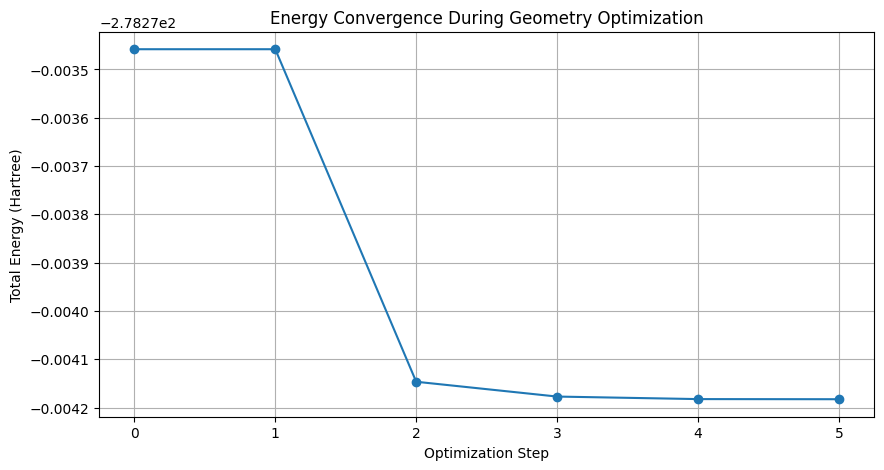

In [25]:
# エネルギー収束のプロット
plt.figure(figsize=(10, 5))
plt.plot(energies, marker='o')
plt.title('Energy Convergence During Geometry Optimization')
plt.xlabel('Optimization Step')
plt.ylabel('Total Energy (Hartree)')
plt.grid(True)
plt.show()